# Regression Predict Student Solution

© Explore Data Science Academy

---
### Honour Code

We {**TEAM 8**}, confirm - by submitting this document - that the solutions in this notebook are a result of our own work and that we abide by the [EDSA honour code](https://drive.google.com/file/d/1QDCjGZJ8-FmJE3bZdIQNwnJyQKPhHZBn/view?usp=sharing).

Non-compliance with the honour code constitutes a material breach of contract.

### Predict Overview: Spain Electricity Shortfall Challenge

The government of Spain is considering an expansion of it's renewable energy resource infrastructure investments. As such, they require information on the trends and patterns of the countries renewable sources and fossil fuel energy generation. Your company has been awarded the contract to:

- 1. analyse the supplied data;
- 2. identify potential errors in the data and clean the existing data set;
- 3. determine if additional features can be added to enrich the data set;
- 4. build a model that is capable of forecasting the three hourly demand shortfalls;
- 5. evaluate the accuracy of the best machine learning model;
- 6. determine what features were most important in the model’s prediction decision, and
- 7. explain the inner working of the model to a non-technical audience.

Formally the problem statement was given to you, the senior data scientist, by your manager via email reads as follow:

> In this project you are tasked to model the shortfall between the energy generated by means of fossil fuels and various renewable sources - for the country of Spain. The daily shortfall, which will be referred to as the target variable, will be modelled as a function of various city-specific weather features such as `pressure`, `wind speed`, `humidity`, etc. As with all data science projects, the provided features are rarely adequate predictors of the target variable. As such, you are required to perform feature engineering to ensure that you will be able to accurately model Spain's three hourly shortfalls.
 
On top of this, she has provided you with a starter notebook containing vague explanations of what the main outcomes are. 

<a id="cont"></a>

## Table of Contents

<a href=#one>1. Importing Packages</a>

<a href=#two>2. Loading Data</a>

<a href=#three>3. Exploratory Data Analysis (EDA)</a>

<a href=#four>4. Data Engineering</a>

<a href=#five>5. Modeling</a>

<a href=#six>6. Model Performance</a>

<a href=#seven>7. Model Explanations</a>

 <a id="one"></a>
## 1. Importing Packages
<a href=#cont>Back to Table of Contents</a>

---
    
| ⚡ Description: Importing Packages ⚡ |
| :--------------------------- |
| In this section you are required to import, and briefly discuss, the libraries that will be used throughout your analysis and modelling. |

---

##### For this project, we will use the **df_train.csv** dataset.
* ##### It contains various city-specific weather features such as pressure, wind speed, humidity, etc. 
* ##### We want to accurately model Spain's three hourly shortfall between the energy generated by means of fossil fuels and various renewable sources

In [1]:
# Libraries for data loading, data manipulation and data visulisation
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Libraries for data preparation and model building
from sklearn.linear_model import LinearRegression
from sklearn import metrics
from sklearn.model_selection import train_test_split
from statsmodels.graphics.correlation import plot_corr
from sklearn.preprocessing import MinMaxScaler
from scipy.stats import pearsonr
from sklearn.feature_selection import VarianceThreshold
from statsmodels.formula.api import ols
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import Ridge
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeRegressor
import math
from sklearn.tree import plot_tree
from sklearn.ensemble import RandomForestRegressor
from sklearn.svm import SVR
# Setting global constants to ensure notebook results are reproducible
PARAMETER_CONSTANT = 100 ###

<a id="two"></a>
## 2. Loading the Data
<a class="anchor" id="1.1"></a>
<a href=#cont>Back to Table of Contents</a>

---
    
| ⚡ Description: Loading the data ⚡ |
| :--------------------------- |
| In this section you are required to load the data from the `df_train` file into a DataFrame. |

---

**Load the Train csv data that was downloaded--**
Set index column to zero

#### **Let's read the data for exploration.**

In [2]:
df = pd.read_csv('df_train.csv', index_col=0) # load the data
df.head()

,time,Madrid_wind_speed,Valencia_wind_deg,Bilbao_rain_1h,Valencia_wind_speed,Seville_humidity,Madrid_humidity,Bilbao_clouds_all,Bilbao_wind_speed,Seville_clouds_all,...,Madrid_temp_max,Barcelona_temp,Bilbao_temp_min,Bilbao_temp,Barcelona_temp_min,Bilbao_temp_max,Seville_temp_min,Madrid_temp,Madrid_temp_min,load_shortfall_3h
0,2015-01-01 03:00:00,0.666667,level_5,0.0,0.666667,74.333333,64.000000,0.0,1.000000,0.0,...,265.938000,281.013000,269.338615,269.338615,281.013000,269.338615,274.254667,265.938000,265.938000,6715.666667
1,2015-01-01 06:00:00,0.333333,level_10,0.0,1.666667,78.333333,64.666667,0.0,1.000000,0.0,...,266.386667,280.561667,270.376000,270.376000,280.561667,270.376000,274.945000,266.386667,266.386667,4171.666667
2,2015-01-01 09:00:00,1.000000,level_9,0.0,1.000000,71.333333,64.333333,0.0,1.000000,0.0,...,272.708667,281.583667,275.027229,275.027229,281.583667,275.027229,278.792000,272.708667,272.708667,4274.666667
3,2015-01-01 12:00:00,1.000000,level_8,0.0,1.000000,65.333333,56.333333,0.0,1.000000,0.0,...,281.895219,283.434104,281.135063,281.135063,283.434104,281.135063,285.394000,281.895219,281.895219,5075.666667
4,2015-01-01 15:00:00,1.000000,level_7,0.0,1.000000,59.000000,57.000000,2.0,0.333333,0.0,...,280.678437,284.213167,282.252063,282.252063,284.213167,282.252063,285.513719,280.678437,280.678437,6620.666667


<a id="three"></a>
## 3. Exploratory Data Analysis (EDA)
<a class="anchor" id="1.1"></a>
<a href=#cont>Back to Table of Contents</a>

---
    
| ⚡ Description: Exploratory data analysis ⚡ |
| :--------------------------- |
| In this section, you are required to perform an in-depth analysis of all the variables in the DataFrame. |

---


#### **Let's explore the dataset.**

In [3]:
 df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 8763 entries, 0 to 8762
Data columns (total 48 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   time                  8763 non-null   object 
 1   Madrid_wind_speed     8763 non-null   float64
 2   Valencia_wind_deg     8763 non-null   object 
 3   Bilbao_rain_1h        8763 non-null   float64
 4   Valencia_wind_speed   8763 non-null   float64
 5   Seville_humidity      8763 non-null   float64
 6   Madrid_humidity       8763 non-null   float64
 7   Bilbao_clouds_all     8763 non-null   float64
 8   Bilbao_wind_speed     8763 non-null   float64
 9   Seville_clouds_all    8763 non-null   float64
 10  Bilbao_wind_deg       8763 non-null   float64
 11  Barcelona_wind_speed  8763 non-null   float64
 12  Barcelona_wind_deg    8763 non-null   float64
 13  Madrid_clouds_all     8763 non-null   float64
 14  Seville_wind_speed    8763 non-null   float64
 15  Barcelona_rain_1h    

##### From the information provided above, we observed the following:
* ##### the dataset has __8763__ rows and __49__ features.
* ##### there are three(3) categorical variables, denoted as _object_ dtype, with the remaining __46__ features being numeric.
* ##### the column _time_ should not be a categorical variable but a datetime type.
##### In data engineering we will convert all categorical data to numeric data with the use of dummy encoding.

#### **Next, let us take a look at the descriptive statistics of our datasets.**

##### Descriptive statistics are brief descriptive coefficients that summarize a given data set, such as the mean, median, and mode,standard deviation, variance, minimum and maximum variables. 
##### Below is the Descriptive statistics of the train data set.

In [4]:
df.describe().T # look at data statistics

,count,mean,std,min,25%,50%,75%,max
Madrid_wind_speed,8763.0,2.425729,1.850371,0.000000,1.000000,2.000000,3.333333,1.300000e+01
Bilbao_rain_1h,8763.0,0.135753,0.374901,0.000000,0.000000,0.000000,0.100000,3.000000e+00
Valencia_wind_speed,8763.0,2.586272,2.411190,0.000000,1.000000,1.666667,3.666667,5.200000e+01
Seville_humidity,8763.0,62.658793,22.621226,8.333333,44.333333,65.666667,82.000000,1.000000e+02
Madrid_humidity,8763.0,57.414717,24.335396,6.333333,36.333333,58.000000,78.666667,1.000000e+02
Bilbao_clouds_all,8763.0,43.469132,32.551044,0.000000,10.000000,45.000000,75.000000,1.000000e+02
Bilbao_wind_speed,8763.0,1.850356,1.695888,0.000000,0.666667,1.000000,2.666667,1.266667e+01
Seville_clouds_all,8763.0,13.714748,24.272482,0.000000,0.000000,0.000000,20.000000,9.733333e+01
Bilbao_wind_deg,8763.0,158.957511,102.056299,0.000000,73.333333,147.000000,234.000000,3.593333e+02
Barcelona_wind_speed,8763.0,2.870497,1.792197,0.000000,1.666667,2.666667,4.000000,1.266667e+01


##### From the above data statistics, we observed the following:
* ##### the minimum load_shortfall has a negative value which shows that energy generated from renewable sources exceeds energy generated from fossil fuel. 
* ##### some features has zero minimum values evidently showing nothing was recorded or probably that event did not occur at the time of recording.

* ##### some feature also had high std values which show the presence of outliers. 
* ##### some features have null values, this could be a result of no records.

#### **Next, let's take a look at the columns with missing values and number of missing values per feature.**

In [5]:
df.isnull().sum() #check for null values

time                       0
Madrid_wind_speed          0
Valencia_wind_deg          0
Bilbao_rain_1h             0
Valencia_wind_speed        0
Seville_humidity           0
Madrid_humidity            0
Bilbao_clouds_all          0
Bilbao_wind_speed          0
Seville_clouds_all         0
Bilbao_wind_deg            0
Barcelona_wind_speed       0
Barcelona_wind_deg         0
Madrid_clouds_all          0
Seville_wind_speed         0
Barcelona_rain_1h          0
Seville_pressure           0
Seville_rain_1h            0
Bilbao_snow_3h             0
Barcelona_pressure         0
Seville_rain_3h            0
Madrid_rain_1h             0
Barcelona_rain_3h          0
Valencia_snow_3h           0
Madrid_weather_id          0
Barcelona_weather_id       0
Bilbao_pressure            0
Seville_weather_id         0
Valencia_pressure       2068
Seville_temp_max           0
Madrid_pressure            0
Valencia_temp_max          0
Valencia_temp              0
Bilbao_weather_id          0
Seville_temp  

##### We noticed that Valencia_pressure has 2068 null values. A more closer look would be given to it during data engineering.
##### If they are numerical value, then the null values would be replaced with the mean of the feature. 
##### However if they are categorical value, then the null values would be replaced with the mode of the feature.

##### We also observed that time variable has to be changed in it correct format, this would be done in featue engineering

#### **This is a plot of time and loadshortfall**

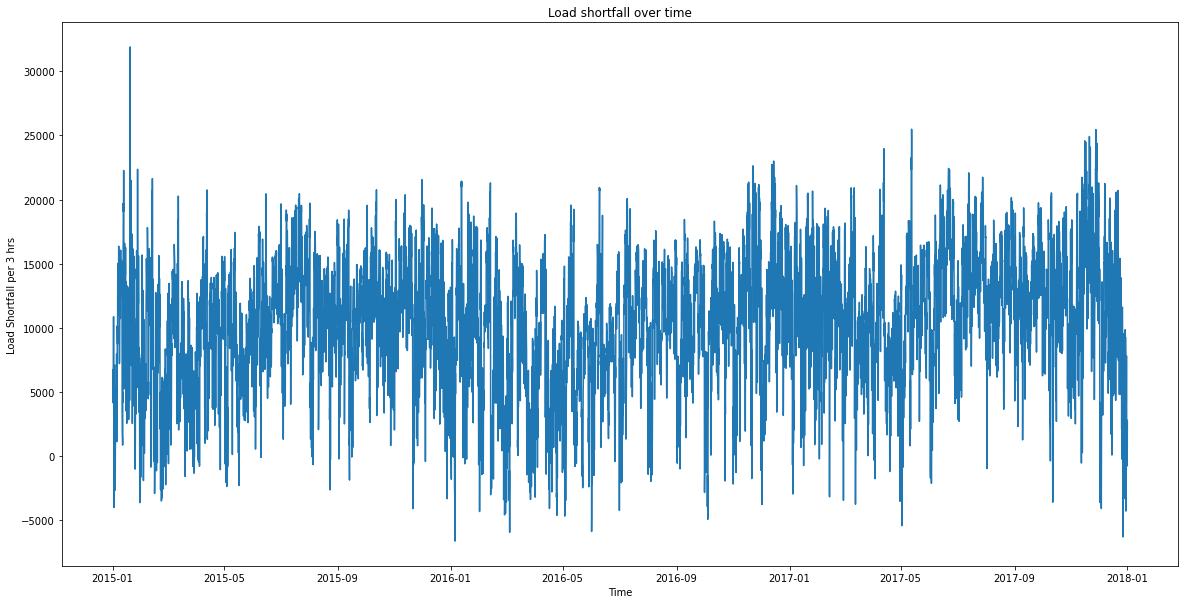

In [6]:
fig = plt.figure(figsize=(20,10));
plt.plot(df['time'].astype('datetime64'),df['load_shortfall_3h'])
plt.title('Load shortfall over time')
plt.xlabel('Time')
plt.ylabel('Load Shortfall per 3 hrs')
plt.show()

##### From the visuals, we observed a common trend of loadshort fall ranging from 5000 and 15000 between 2015 and 2018 - most of the loadshort fall is positive.
##### However there are spikes in the 2015, 2016, 2017 and 2018.
##### The negative loashort fall here as illustrated by the diagram is because of the increase in energy generated from renewable sources.

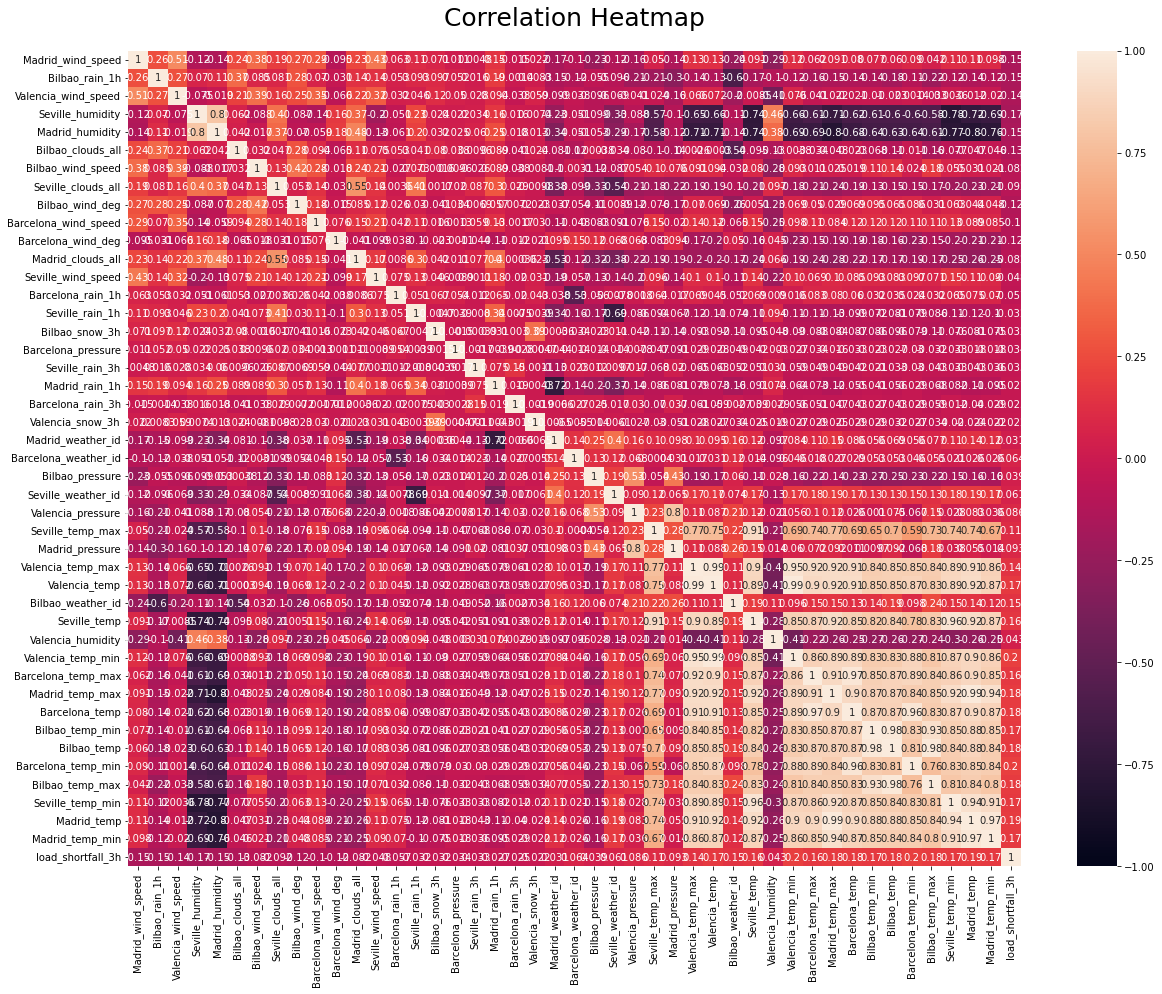

In [7]:
fig = plt.figure(figsize=(20,15));
heatmap = sns.heatmap(df.corr(), vmin=-1, vmax=1, annot=True)
heatmap.set_title('Correlation Heatmap', fontdict={'fontsize':25}, pad=25); # plot relevant feature interactions

From the figure above, it is observed that some independent variables are mutlicollinear or exhibit a strong relationship with each other. For example, Bilbao weather Id, Bilbao temp min, max and Bilbao temp all show multicollinearity with each other.  Hence they would be dropped but further test would be done to adequately decide which variable to drop. The figure below confirms this observation.

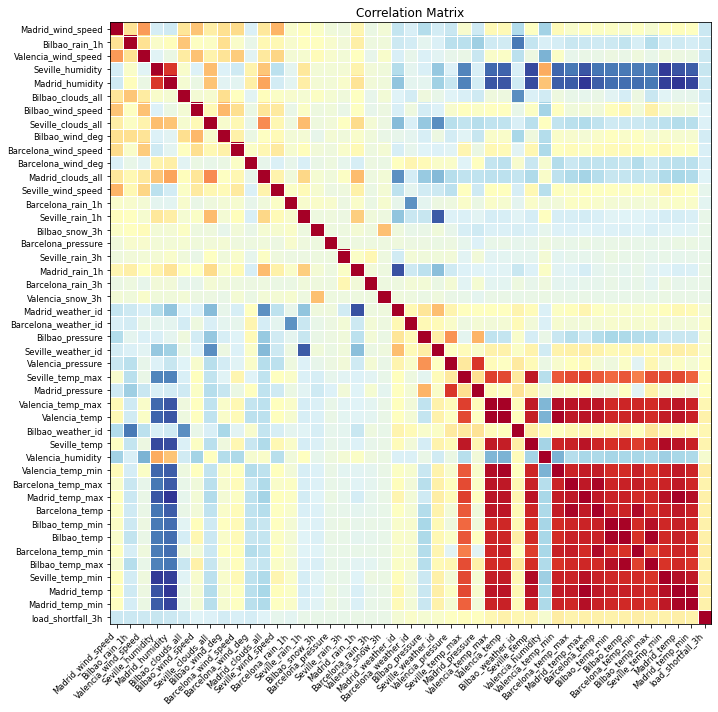

In [8]:
fig = plt.figure(figsize=(30,10));
ax = fig.add_subplot(111);
plot_corr(df.corr(), xnames = df.corr().columns, ax = ax);

In [9]:
df.corr() # evaluate correlation

,Madrid_wind_speed,Bilbao_rain_1h,Valencia_wind_speed,Seville_humidity,Madrid_humidity,Bilbao_clouds_all,Bilbao_wind_speed,Seville_clouds_all,Bilbao_wind_deg,Barcelona_wind_speed,...,Madrid_temp_max,Barcelona_temp,Bilbao_temp_min,Bilbao_temp,Barcelona_temp_min,Bilbao_temp_max,Seville_temp_min,Madrid_temp,Madrid_temp_min,load_shortfall_3h
Madrid_wind_speed,1.000000,0.259719,0.513092,-0.117892,-0.137092,0.244001,0.377854,0.191251,0.270950,0.294640,...,0.091464,0.080133,0.077330,0.060467,0.089992,0.042114,0.110278,0.109572,0.098138,-0.150981
Bilbao_rain_1h,0.259719,1.000000,0.265864,0.069878,0.106765,0.370733,0.085398,0.081131,0.279350,0.069997,...,-0.148397,-0.138901,-0.141269,-0.182494,-0.106593,-0.219871,-0.120575,-0.135927,-0.116431,-0.152510
Valencia_wind_speed,0.513092,0.265864,1.000000,-0.075227,-0.019388,0.210524,0.386478,0.163675,0.248643,0.347966,...,-0.021970,-0.021456,-0.010166,-0.022676,0.001413,-0.033271,0.003618,-0.011982,-0.019742,-0.142791
Seville_humidity,-0.117892,0.069878,-0.075227,1.000000,0.799831,0.061680,-0.088180,0.399436,-0.087246,-0.138625,...,-0.708937,-0.617797,-0.605493,-0.604733,-0.595065,-0.583718,-0.784850,-0.717171,-0.688664,-0.167290
Madrid_humidity,-0.137092,0.106765,-0.019388,0.799831,1.000000,0.041878,-0.016808,0.374112,-0.069570,-0.058518,...,-0.803260,-0.684867,-0.635760,-0.634825,-0.636777,-0.611395,-0.769591,-0.802605,-0.759633,-0.150536
Bilbao_clouds_all,0.244001,0.370733,0.210524,0.061680,0.041878,1.000000,0.031915,0.046737,0.280154,0.094019,...,-0.048491,-0.023171,-0.067731,-0.114118,-0.010804,-0.158014,-0.077417,-0.046686,-0.046189,-0.127293
Bilbao_wind_speed,0.377854,0.085398,0.386478,-0.088180,-0.016808,0.031915,1.000000,0.127344,0.417534,0.275317,...,0.025367,0.018967,0.107302,0.142435,0.023711,0.177123,0.055077,0.031245,0.021425,-0.081602
Seville_clouds_all,0.191251,0.081131,0.163675,0.399436,0.374112,0.046737,0.127344,1.000000,0.053482,0.136591,...,-0.238895,-0.186463,-0.134249,-0.152393,-0.153412,-0.165567,-0.200453,-0.227094,-0.212758,-0.091804
Bilbao_wind_deg,0.270950,0.279350,0.248643,-0.087246,-0.069570,0.280154,0.417534,0.053482,1.000000,0.177393,...,0.028535,0.068701,0.095047,0.065396,0.086482,0.031187,0.062663,0.044102,0.048397,-0.120800
Barcelona_wind_speed,0.294640,0.069997,0.347966,-0.138625,-0.058518,0.094019,0.275317,0.136591,0.177393,1.000000,...,0.084209,0.116240,0.123403,0.120361,0.109268,0.109692,0.130367,0.089365,0.084679,-0.103633


From the correlation above, we observed that some feature has negative correlation with the target variable while other feature showed otherwise.

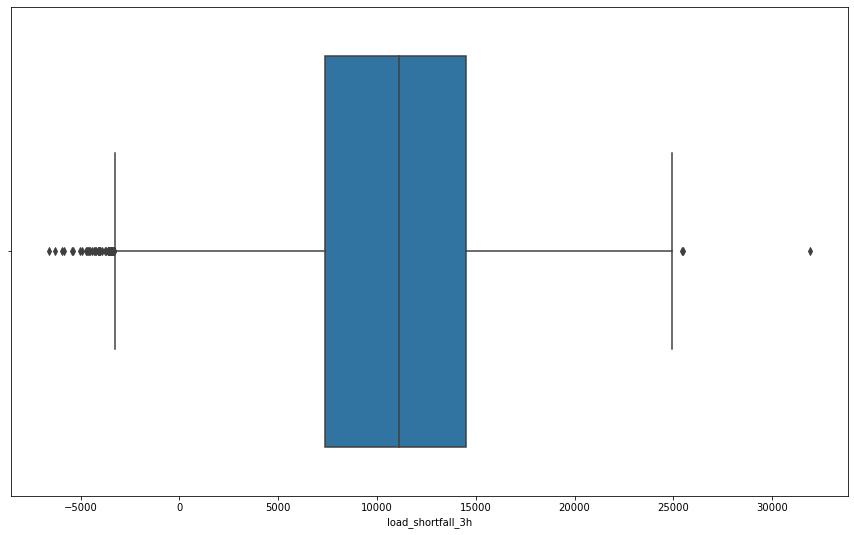

In [10]:
fig = plt.figure(figsize=(15,9));
sns.boxplot(x='load_shortfall_3h', data=df);# have a look at feature distributions

The boxplot for the Load shortfall for 3 hrs show that the feature has outliers

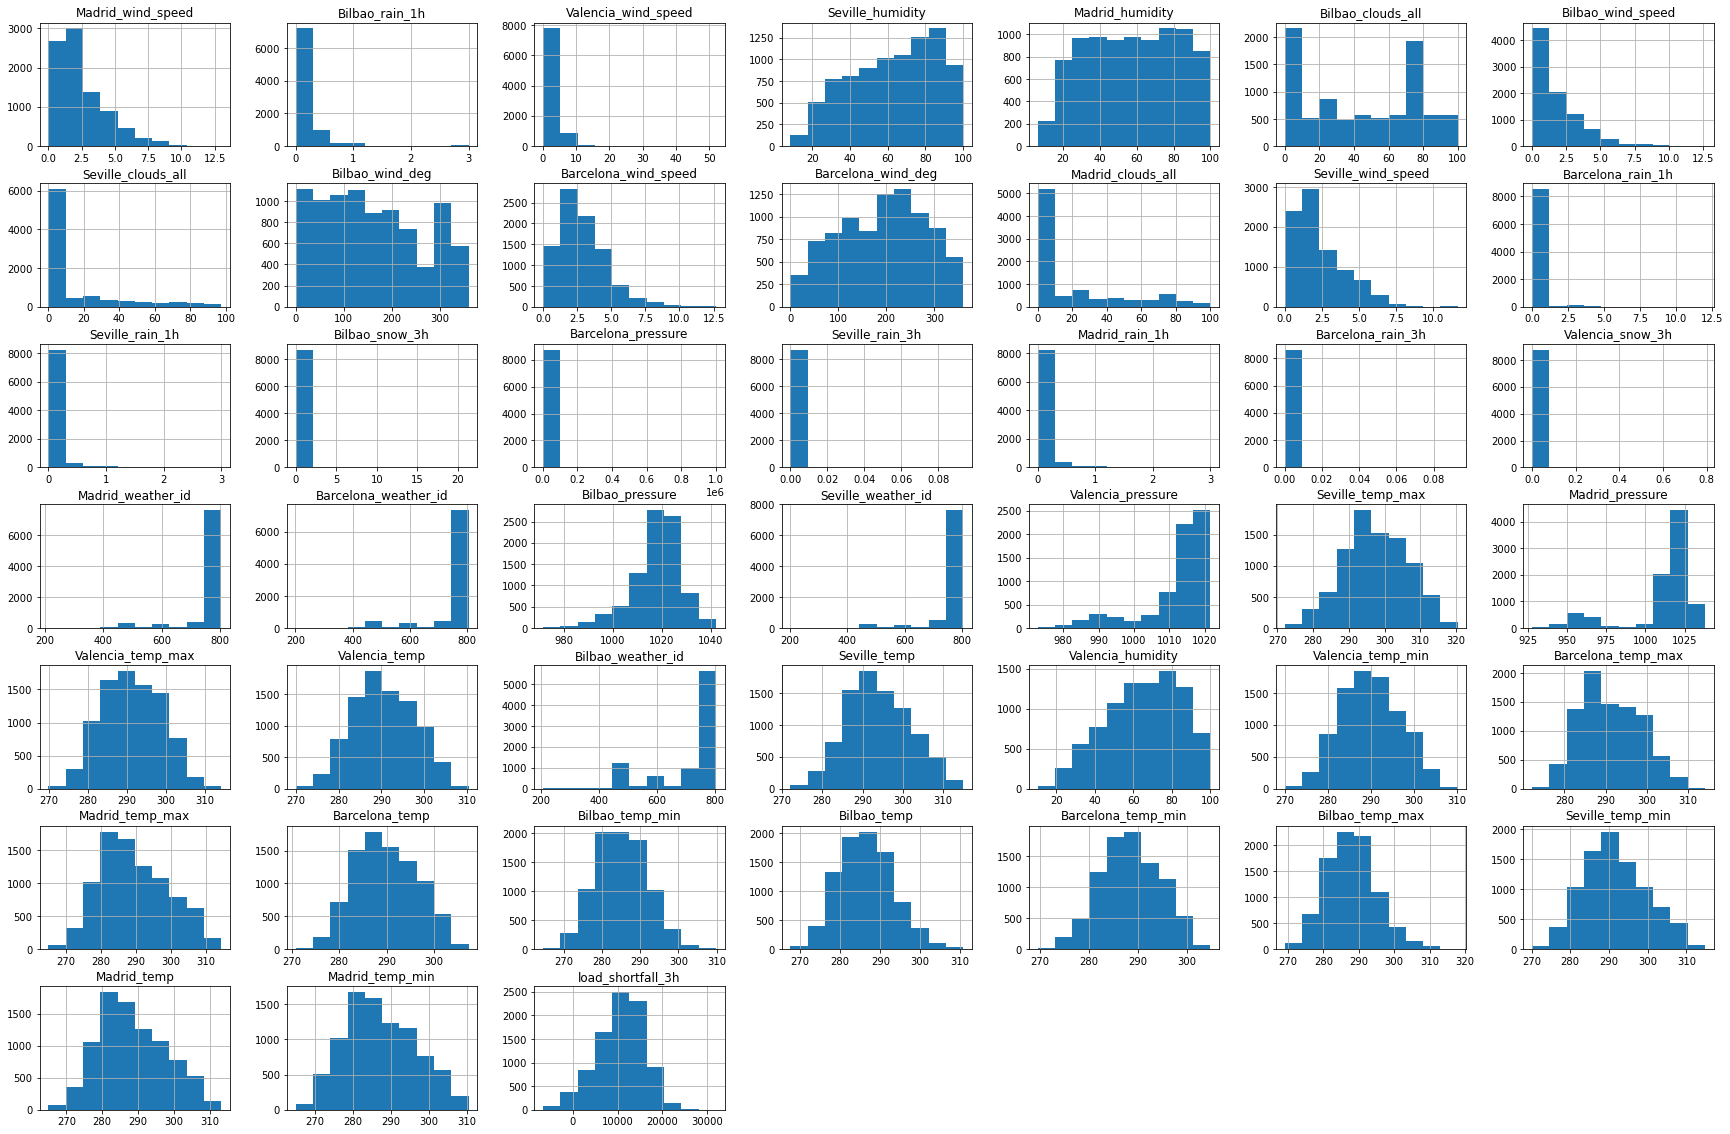

In [11]:
df.hist(figsize=(30,20));

The figure above show different feature distributions. From figure above, Barcelona rain, Valencia snow etc have zero values, this must have likely been an error in data collection.

<a id="four"></a>
## 4. Data Engineering
<a class="anchor" id="1.1"></a>
<a href=#cont>Back to Table of Contents</a>

---
    
| ⚡ Description: Data engineering ⚡ |
| :--------------------------- |
| In this section you are required to: clean the dataset, and possibly create new features - as identified in the EDA phase. |

---

#### From our Exploratory Data Analysis, we noticed that our time column is in object type. We herefore decided to convert it to datetime and split it further into Day, Month, Year and Hour
#### After changing our time feature to datetime, it is essential to further change the different feature created to category since our plan is to use dummy encoding to get a numerical value for the values.

#### We would create a function for this purpose

In [12]:
#1

def time_column_map(df, column_name,levels,drop_first=False, dtype = None):
    '''
    Paramters
    .........
    1. df: The name of the dataframe, in pandas DataFrame format
    2. column_name: The name of the time column you are referencing in your DataFrame, in string 'str' format
    3. levels: Consist of the new column outputs you want from your time series. Hour(h), Day(d), Month(m), Year(y).
        And should be a list of strings. i.e levels = ['hour','day','month','year']
    4. drop_first: Dropping the original column_after manipulation, this is set to drop_true = False
    5. dtype: This is set to None, or you could input whatever data type you want your new columns to be in    
    '''
    df= df
    column = column_name
    level = levels
    # Changing the column data type to datetime
    df[column] = pd.to_datetime(df[column])
    # Creating the new columns from the level list
    for i in levels:
        if i=='m':
            df['month'] =df[column].apply(lambda x : x.month).astype(dtype)
        elif i=='d':
            df['day'] = df[column].apply(lambda x : x.day).astype(dtype)
        elif i=='h':
            df['hour'] = df[column].apply(lambda x : x.hour).astype(dtype)
        elif i=='y':
            df['year'] = df[column].apply(lambda x : x.year).astype(dtype)
        else:
            pass
    # Choose whether to drop the column or not
    if drop_first==True:
        df = df.drop(column_name,axis=1)
    else:
        pass
    return df

In [13]:
df = time_column_map(df,column_name='time',levels=['y','m','d','h'],drop_first=True, dtype='int64')
df.head()

,Madrid_wind_speed,Valencia_wind_deg,Bilbao_rain_1h,Valencia_wind_speed,Seville_humidity,Madrid_humidity,Bilbao_clouds_all,Bilbao_wind_speed,Seville_clouds_all,Bilbao_wind_deg,...,Barcelona_temp_min,Bilbao_temp_max,Seville_temp_min,Madrid_temp,Madrid_temp_min,load_shortfall_3h,year,month,day,hour
0,0.666667,level_5,0.0,0.666667,74.333333,64.000000,0.0,1.000000,0.0,223.333333,...,281.013000,269.338615,274.254667,265.938000,265.938000,6715.666667,2015,1,1,3
1,0.333333,level_10,0.0,1.666667,78.333333,64.666667,0.0,1.000000,0.0,221.000000,...,280.561667,270.376000,274.945000,266.386667,266.386667,4171.666667,2015,1,1,6
2,1.000000,level_9,0.0,1.000000,71.333333,64.333333,0.0,1.000000,0.0,214.333333,...,281.583667,275.027229,278.792000,272.708667,272.708667,4274.666667,2015,1,1,9
3,1.000000,level_8,0.0,1.000000,65.333333,56.333333,0.0,1.000000,0.0,199.666667,...,283.434104,281.135063,285.394000,281.895219,281.895219,5075.666667,2015,1,1,12
4,1.000000,level_7,0.0,1.000000,59.000000,57.000000,2.0,0.333333,0.0,185.000000,...,284.213167,282.252063,285.513719,280.678437,280.678437,6620.666667,2015,1,1,15


#### Remember that in our EDA, we noticed that a feature has some missing values. Now we input the mean of the values to replace all the Null values.

#### We would also create a function that searches through the entire data for variables with null values, and fill the null values with the mean of the variable

In [14]:
#2
def fill_null_val(df):
    ''' Takes in a pandas DataFrame, and search for columns with NaN values
        And replaces the NaN values with the indiviual column Mean.
    '''
    # Searching through the dataframe for columns with null values and putting them in a list 
    null_column = df.columns[df.isna().any()].to_list()
    # Iterating through the null_column list and filling the NaN Values with the individual column mean
    for i in null_column:
        mean_value = round(df[i].mean(),2) # Rounding the calculated mean to 2 decimal places
        df[i] = df[i].fillna(value=mean_value) # Replacing the NaN With the mean
    return df

In [15]:
df = fill_null_val(df)
df.info()


<class 'pandas.core.frame.DataFrame'>
Int64Index: 8763 entries, 0 to 8762
Data columns (total 51 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Madrid_wind_speed     8763 non-null   float64
 1   Valencia_wind_deg     8763 non-null   object 
 2   Bilbao_rain_1h        8763 non-null   float64
 3   Valencia_wind_speed   8763 non-null   float64
 4   Seville_humidity      8763 non-null   float64
 5   Madrid_humidity       8763 non-null   float64
 6   Bilbao_clouds_all     8763 non-null   float64
 7   Bilbao_wind_speed     8763 non-null   float64
 8   Seville_clouds_all    8763 non-null   float64
 9   Bilbao_wind_deg       8763 non-null   float64
 10  Barcelona_wind_speed  8763 non-null   float64
 11  Barcelona_wind_deg    8763 non-null   float64
 12  Madrid_clouds_all     8763 non-null   float64
 13  Seville_wind_speed    8763 non-null   float64
 14  Barcelona_rain_1h     8763 non-null   float64
 15  Seville_pressure     

Refering back to the heatmap and data correlation, some features are highly correlated with each other, hence We decided to drop some feature.

In [16]:
#df1=df.drop(['time','time1','Madrid_temp_min', 'Seville_temp_min', 'Barcelona_temp_max', 'Valencia_temp_max', 'Madrid_humidity','Valencia_temp_min', 'Barcelona_temp_min', 'Madrid_temp_max', 'Bilbao_temp_max', 'Madrid_temp_min', 'Seville_temp_min', 'Bilbao_temp_min', 'Barcelona_temp_max', 'Valencia_temp_max', 'Valencia_temp_min', 'Barcelona_temp_min', 'Bilbao_temp_max', 'Madrid_temp_min', 'Seville_temp_min', 'Bilbao_temp_min','Valencia_pressure','Seville_pressure','Valencia_wind_deg','Year'], axis=1)

#### All categorical data needs to be converted to numerical values for our model to fit appropriately. This is what we did below. And we would also create a function for that purpose. That creates dummy variables from our categorical variables

In [17]:
# def dummy_variables(df):
#     # Search through the entire dataframe for categorical variables
#     # Create dummies, and drop the parent categorical variable
#     df = pd.get_dummies(df, drop_first=True)
#     # Reorder the dataframe, so the target variable comes last.
#     column_index = [col for col in df.columns if col !='load_shortfall_3h' ] + ["load_shortfall_3h"]
#     df = df.reindex(columns=column_index)

#     return df

In [18]:
# df = dummy_variables(df)
# print(df.shape)
# df.head()

In [19]:
df =df.drop(['Seville_pressure','Valencia_wind_deg'], axis=1)

In [20]:
df.columns

Index(['Madrid_wind_speed', 'Bilbao_rain_1h', 'Valencia_wind_speed',
       'Seville_humidity', 'Madrid_humidity', 'Bilbao_clouds_all',
       'Bilbao_wind_speed', 'Seville_clouds_all', 'Bilbao_wind_deg',
       'Barcelona_wind_speed', 'Barcelona_wind_deg', 'Madrid_clouds_all',
       'Seville_wind_speed', 'Barcelona_rain_1h', 'Seville_rain_1h',
       'Bilbao_snow_3h', 'Barcelona_pressure', 'Seville_rain_3h',
       'Madrid_rain_1h', 'Barcelona_rain_3h', 'Valencia_snow_3h',
       'Madrid_weather_id', 'Barcelona_weather_id', 'Bilbao_pressure',
       'Seville_weather_id', 'Valencia_pressure', 'Seville_temp_max',
       'Madrid_pressure', 'Valencia_temp_max', 'Valencia_temp',
       'Bilbao_weather_id', 'Seville_temp', 'Valencia_humidity',
       'Valencia_temp_min', 'Barcelona_temp_max', 'Madrid_temp_max',
       'Barcelona_temp', 'Bilbao_temp_min', 'Bilbao_temp',
       'Barcelona_temp_min', 'Bilbao_temp_max', 'Seville_temp_min',
       'Madrid_temp', 'Madrid_temp_min', 'load_shortfa

In [21]:
def split(df):
# Separating the data into features and variables
    X = df.drop(['load_shortfall_3h'], axis=1)
    y = df['load_shortfall_3h']
    return X,y

In [22]:
X,y = split(df)

#### Next we create a function that would standardize our data, this brings down all of the features to a common scale, and does not change the differences in the range of the values.

In [23]:
def features_scaling(X):
    # Standardizing all of the Feature Variables
    scaler = StandardScaler()
    X_scaled = scaler.fit_transform(X)
    return X_scaled

In [24]:
X=features_scaling(X)

#### Finally, we integrate all of our data preprocessing functions into one function called "preprocessing". We feed it our Data and it gives us the cleaned/scaled Feature Variables as "X", and the Target/Label/Independent Variable as "y"

In [25]:
# def preprocessing(df):
#     # Times series feature manipulation
#     df = time_column_map(df,column_name='time',levels=['h','d','m','y'],drop_first=True,dtype='category')
#     # Filling in the null values
#     df =fill_null_val(df)
#     # Drop unwanted columns, that would not be significant to our model prediction
#     df =df.drop(['Barcelona_weather_id', 'Seville_weather_id',
#                  'Bilbao_weather_id','Madrid_weather_id','Seville_rain_1h','Madrid_rain_1h',
#                  'Barcelona_rain_1h','Seville_rain_1h','Seville_weather_id'], axis=1)
#     # Create dummy variables from our categorical variables
#     df= dummy_variables(df)

#     return df

<a id="five"></a>
## 5. Modelling
<a class="anchor" id="1.1"></a>
<a href=#cont>Back to Table of Contents</a>

---
    
| ⚡ Description: Modelling ⚡ |
| :--------------------------- |
| In this section, you are required to create one or more regression models that are able to accurately predict the thee hour load shortfall. |

---

#### We would be Evaluating the relative performance of a couple Machine Learning models on our dataset
##### List of Machine Learning Models Used
---
| ⚡ Linear Regression ⚡ |
| :--------------------------- |

| ⚡ Lasso Regression ⚡ |
| :--------------------------- |

| ⚡ Decision Tree Regressor ⚡ |
| :--------------------------- |

| ⚡ Random Forest Regressor ⚡ |
| :--------------------------- |

| ⚡ Support Vector Regressor(SVR) ⚡ |
| :--------------------------- |

---

#### Fitting and training our machine models with the training function we will create

In [26]:
def model_training(X,y,models):
    ''' Function for training the models
        Takes in the X_train(Features), y_train(Label) and also the model name in a list of string objects.
        Keys:['LinearRegression', 'DecisionTreeRegressor', 'RandomForestRegressor','SVR']
        
    '''
    X = X
    y = y
    fit_model_list = []
    X_train, X_test, y_train,y_test = \
    train_test_split(X,y,test_size=0.2,random_state=6)
    model_test_set = [X_test,y_test]
    model_train_set = [X_train,y_train]
    for i in models:
        if i=='LinearRegression':
            #Linear Regression Model Fit
            lm = LinearRegression()
            lm_model = lm.fit(X_train,y_train)
            fit_model_list.append({'Linear Regression':lm_model})
        elif i=='RandomForestRegressor':
            # Random Forest Regressor Model fit
            rfr = RandomForestRegressor(n_estimators=100, max_depth=None)
            rfr_model= rfr.fit(X_train,y_train)
            fit_model_list.append({'Random Forest Regressor':rfr_model})
        elif i=='DecisionTreeRegressor':
            # Decision Tree Regressor Model fit
            dtr = DecisionTreeRegressor()
            dtr_model= dtr.fit(X_train,y_train)
            fit_model_list.append({'Decision Tree Regressor':dtr_model})
        elif i=='SVR':
            svr = SVR(C= 100, epsilon= 0.5, gamma= 1e-07, kernel= 'linear')
            svr_model = svr.fit(X_train,y_train)
            fit_model_list.append({'SVR':svr_model})
        else:
            pass
    return fit_model_list,model_test_set,model_train_set

In [27]:
# Create a list for the names of the models we would use to fit and train the data.
models= ['LinearRegression','RandomForestRegressor','SVR','DecisionTreeRegressor']
# Training the Data
fit_model_list,model_test_set,model_train_set=model_training(X,y,models)


<a id="six"></a>
## 6. Model Performance
<a class="anchor" id="1.1"></a>
<a href=#cont>Back to Table of Contents</a>

---
    
| ⚡ Description: Model performance ⚡ |
| :--------------------------- |
| In this section you are required to compare the relative performance of the various trained ML models on a holdout dataset and comment on what model is the best and why. |

---

#### Testing and evaluating the individual performances of each of our models, we would create a function for this  purpose as well

In [28]:
def model_testing(fit_model_list,model_test_set,models):
    n = len(fit_model_list)
    X_test=model_test_set[0]
    y_test=model_test_set[1]
        # Create figure and axes
    f, ax = plt.subplots(figsize=(15,5), nrows=1, ncols=n, sharey=True)
    # Loop through all axes to plot each model's results
    for i in range(len(fit_model_list)):
        model_name=models[i]
        #model = list(n.values())[0]
        prediction = list(fit_model_list[i].values())[0].predict(X_test)
        test_mse = round(np.sqrt(mean_squared_error(y_test, prediction)), 4)
        test_r2 = round(r2_score(y_test,prediction), 4)
        title_str = f"Model: ('{model_name}') \n" + \
                    f"test RMSE = {test_mse} \n" + \
                    f"test $R^{2}$ = {test_r2}"
        ax[i].set_title(title_str)
        ax[i].set_xlabel('Actual')
        ax[i].set_ylabel('Predicted')
        ax[i].plot(y_test,y_test, 'r')
        ax[i].scatter(y_test, prediction)
    return ax,prediction


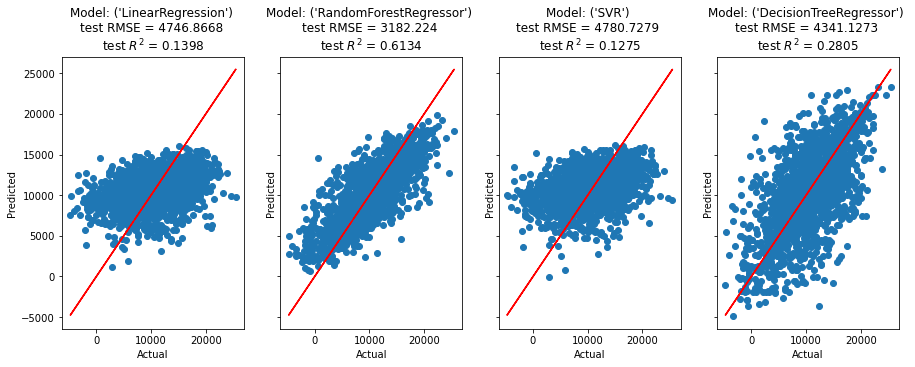

In [29]:
# Calling our model_testing function to display our model performance results
ax,prediction = model_testing(fit_model_list,model_test_set,models)

In [30]:
model= list(fit_model_list[1].values())[0]

In [31]:
import pickle
model_save_path = "2110ACDS-ND8.pkl"
with open(model_save_path,'wb') as file:
    pickle.dump(model,file)
    

#### Model deployment 

In [42]:
model

RandomForestRegressor()

<a id="seven"></a>
## 7. Model Explanations
<a class="anchor" id="1.1"></a>
<a href=#cont>Back to Table of Contents</a>

---
    
| ⚡ Description: Model explanation ⚡ |
| :--------------------------- |
| In this section, you are required to discuss how the best performing model works in a simple way so that both technical and non-technical stakeholders can grasp the intuition behind the model's inner workings. |

---

Out of the  four (4) different models trained on our data set, we picked Random Forest because it had the lowest RMSE compared to the rest of the models. 

Random forest is a Supervised Machine Learning Algorithm that is used in Regression problems. It builds decision trees on different samples and takes an average. Random forest model creates a different training subset from sample training data with replacement (Bagging) & the final output is based on thier avaerage and variable randomness when building each individual tree to try to create an uncorrelated forest of trees whose prediction by committee is more accurate than that of any individual tree. 
In a non-technical way, it can be likened to a Mango tree with two distinct fruit types (unripe and ripe). Whenever a logic is obeyed, it follows a particular pattern. For example, if the logic statement is that the fruit size is large and the dataset set obeys this logic, then its decision node (tree's branch) moves down to determine if the fruit is ripe or not. If the fruit is then ripe, the decision nodes(tree's branch) moves down to determine what next logic statement would be followed to arrive at a conculsion.
